In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2

In [71]:
# img = cv2.imread('./test_images/kohli.jpg')
img = cv2.imread('./dataset/archive (2)/ISIC_Labelled/Actinic keratosis/ISIC_0024646.jpg')
img.shape

(450, 600, 3)

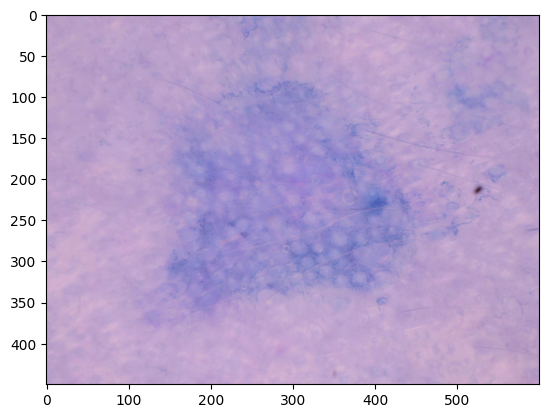

In [72]:
plt.imshow(img)

In [73]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray

array([[165, 164, 167, ..., 170, 172, 171],
       [165, 166, 167, ..., 169, 171, 170],
       [166, 167, 167, ..., 169, 170, 168],
       ...,
       [174, 174, 174, ..., 171, 173, 173],
       [174, 174, 174, ..., 173, 174, 171],
       [174, 174, 174, ..., 173, 173, 172]], dtype=uint8)

In [74]:
gray.shape

(450, 600)

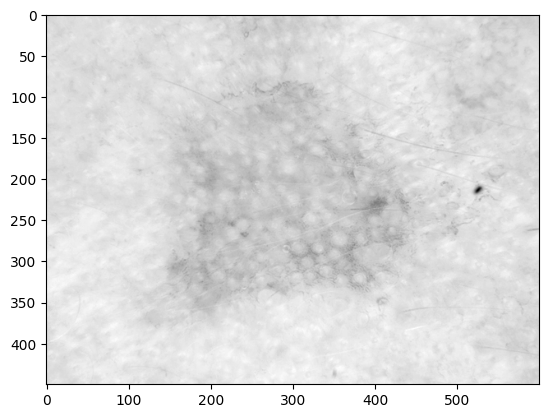

In [75]:
plt.imshow(gray, cmap='gray')

In [76]:
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

lower_skin = np.array([0,20,70],dtype=np.uint8)
upper_skin = np.array([20,255,255],dtype=np.uint8)

skin_mask = cv2.inRange(hsv_img,lower_skin,upper_skin)



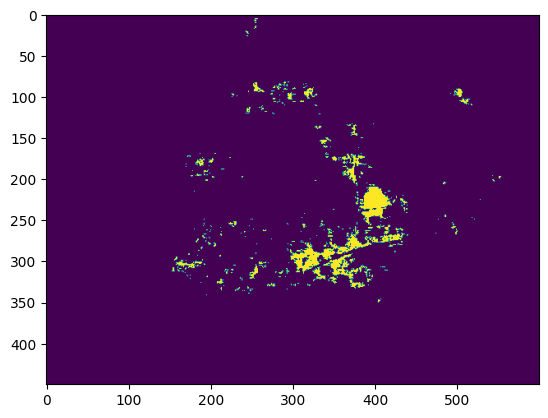

In [77]:
plt.imshow(skin_mask)

In [78]:
kernel = np.ones((5,5),np.uint8)
skin_mask = cv2.morphologyEx(skin_mask,cv2.MORPH_CLOSE,kernel)
skin_mask = cv2.morphologyEx(skin_mask,cv2.MORPH_OPEN,kernel)

In [79]:
skin_detect = cv2.bitwise_and(img,img,mask = skin_mask)


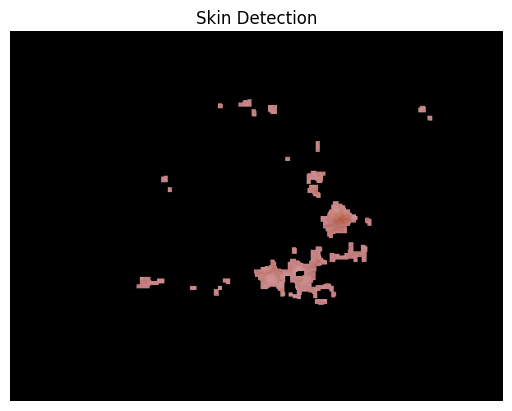

In [80]:
plt.imshow(cv2.cvtColor(skin_detect,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Skin Detection')
plt.show()

In [81]:
# blurred_skin = cv2.GaussianBlur(skin_detect,(15,15),0)

In [83]:
# hair_mask = cv2.bitwise_not(skin_mask)

# inpainted_img = cv2.inpaint(img,hair_mask, inpaintRadius = 3, flags=cv2.INPAINT_TELEA)

# plt.imshow(cv2.cvtColor(inpainted_img,cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.title('Hair removed img')
# plt.show()

In [66]:
# gray_skin_mask = cv2.cvtColor(skin_mask,cv2.COLOR_BGR2GRAY)
# plt.imshow(gray_skin_mask)

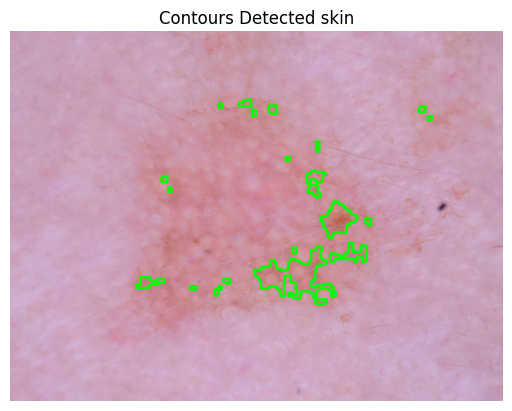

In [84]:
contour, _ = cv2.findContours(skin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_img = img.copy()
cv2.drawContours(contour_img,contour, -1,(0,255,0),2)

plt.imshow(cv2.cvtColor(contour_img,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Contours Detected skin')
plt.show()
